In [1]:
# !pip install matplotlib --upgrade

**6. Based on the data “housing.csv” we demo at our lecture, could you apply whatever data exploration tools to explain, visualize, and provide your insights for this dataset? We will judge your answer based on how deeper insights you can present.**

In [2]:
import pandas as pd

pd.options.display.max_columns = None
pd.options.display.width = 1000

housing = pd.read_csv('/content/housing.csv')
print(housing.head(5))
print(housing.describe())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value ocean_proximity
0    -122.23     37.88                41.0        880.0           129.0       322.0       126.0         8.3252            452600.0        NEAR BAY
1    -122.22     37.86                21.0       7099.0          1106.0      2401.0      1138.0         8.3014            358500.0        NEAR BAY
2    -122.24     37.85                52.0       1467.0           190.0       496.0       177.0         7.2574            352100.0        NEAR BAY
3    -122.25     37.85                52.0       1274.0           235.0       558.0       219.0         5.6431            341300.0        NEAR BAY
4    -122.25     37.85                52.0       1627.0           280.0       565.0       259.0         3.8462            342200.0        NEAR BAY
          longitude      latitude  housing_median_age   total_rooms  total_bedrooms    population    households  media

This dataset reflects the housing summary of California. All features are intuitive except [median_income]. A unit and a time frame are needed to determine what the value represents. It could be thousands of dollars per year (e.g., (-122.23, 37.88) has a median income more than 8 thousands in the last year), or hundred thousands of dollars since the beginning when financial data is recorded. The scatter plot below resembles the landscape of the California. The color displays the number of observations per coordinate - longitude and latitude. The more intense the color, the more observation of that coordinate. It is clear that mostly each coordinate has 1 observation only. Some rare outliers have more than 1 observation for the same coordinate. It is assumed that those coordinates that have multiple observations is because longitude and latitude are rounded to 2 significant figures. As a result, more detailed data in that area are loss due to the rounding.

     longitude  latitude  count
936    -122.41     37.80     15
907    -122.42     37.80     11
865    -122.44     37.78     11
881    -122.43     37.75     10
866    -122.44     37.79     10


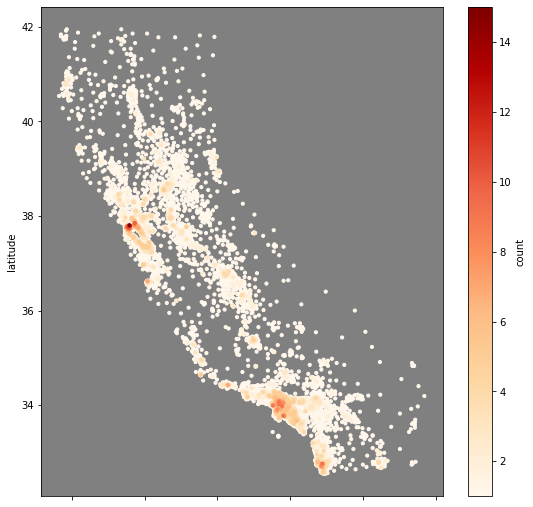

In [28]:
# Observations by longitude and latitude
map_counts = housing.groupby(by=['longitude', 'latitude']).size().reset_index(name='count')
map_counts = map_counts.sort_values(by=['count'])
print(map_counts.sort_values(by=['count'], ascending=False).head(5))
ax = map_counts.plot.scatter(x="longitude", y="latitude", c="count", colormap='OrRd', s=10, figsize=(9,9))
ax.set_facecolor("grey")

The distributions of the continous features other than longitude and latitude are either rightly skewed or multimodal. The rightly skewed distributed features are [total_rooms], [total_bedrooms], [population], [households] and [median_income]. The multimodal distributions are [housing_median_age] and [median_house_value]. The rightly skewed distributions can be explained by:
*  [total_rooms] / [total_bedrooms]: A house usually doesn't have too many rooms because a regular household would not have more 
than 5 people. Therefore, a house usually would have enough rooms for every person in the household and a guest 
room with all other necessities such as bathroom and kitchen. The rightly skewed data represents housing that are specificly built with a lot rooms, or in a dense area with a lot of house for a lot of households.
*  [Population]: [Population] is spread out similarly in most area which is represented by the histogram. Different reason could return a rightly skewed distribution below: 1) Downtown area where most people work and thus they try to live closer to work; 2) Parents usually are concerned if the area is a good school district (especially for highschool). They would move to a better school district if they can afford. As a result, the population would be crowded in an area with good schools. 3) Policies that protect people who stay in the house. For instance, in San Francisco, renters are protected by city law where the landlord cannot evict his/her tenant in any circumstances. Therefore, bad intention people would take advantage of this type of policy and move to a certain area.
*  [Households]: The distribution of this feature is similar to [Population] because the each household is a subset of the population in that area. The same explanation of the rightly skewed [Population] distribution can be applied to this feature.
*  [median_income]: The distribution shows a general true, where most people's income are low, some people have a better income than half the population, and the top 1% have the most income, which is shown by the outliers on the right. However, the distribution of this feature is not as skewed as the above features. The reason for that is because the overall education level is increasing year by year. Since education level usually directly affects one's income, the distribution's mode is not on the left most.

The multimodal distributions can be explained by:
*  [housing_median_age]: The distribution of this feature is multimidal can be explained by the modes in it. There are 3 modes in this distribution - just below 20, around 35 and around 55. For these age bins, people are either starting to build a career, or have a well-established career where they can afford a house. Therefore, the modes of this feature are on those age ranges. The distribution also reveals another piece of information - children and teenagers' population are lower than other age group. This could directly mean the couples in California are not giving birth because of infertility or by choice. Although this dataset only showcases one part of the United States, having this high quality of living, people in California should be aware on this trend in order to avoid population aging.
*  [median_house_value]: From the value_counts function, the two modes come from (111999.4, 160499.6) and (451500.8, 500001.0). The first mode is on the left side of the histogram because that's the median house value for households in that longitude and latitude and it matches up with the first mode in the [median_income] distribution. That is why the range for median house value is at (111999.4, 160499.6). The second mode of this distribution comes from housing that are more high-valued. There could be 2 main reasons for the second modes: 1) Historical buildings - California was once a Spanish colony. The Spanish built different architectures during their colonial period. Those appeals the wealthies to bid for them; 2) Self-built housing by wealthy households; 3) Celebrities' houses - the value of a house increases immensely once a popstar or a famous singer stay or live there for a duration.


(31.6, 36.7]    3555
(16.3, 21.4]    2681
(21.4, 26.5]    2510
(26.5, 31.6]    2354
(11.2, 16.3]    2235
(46.9, 52.0]    1966
(36.7, 41.8]    1900
(41.8, 46.9]    1616
(6.1, 11.2]     1104
(0.948, 6.1]     719
Name: housing_median_age, dtype: int64
(111999.4, 160499.6]    4099
(160499.6, 208999.8]    3771
(63499.2, 111999.4]     3612
(208999.8, 257500.0]    2804
(257500.0, 306000.2]    1764
(451500.8, 500001.0]    1243
(306000.2, 354500.4]    1239
(14513.997, 63499.2]     877
(354500.4, 403000.6]     752
(403000.6, 451500.8]     479
Name: median_house_value, dtype: int64


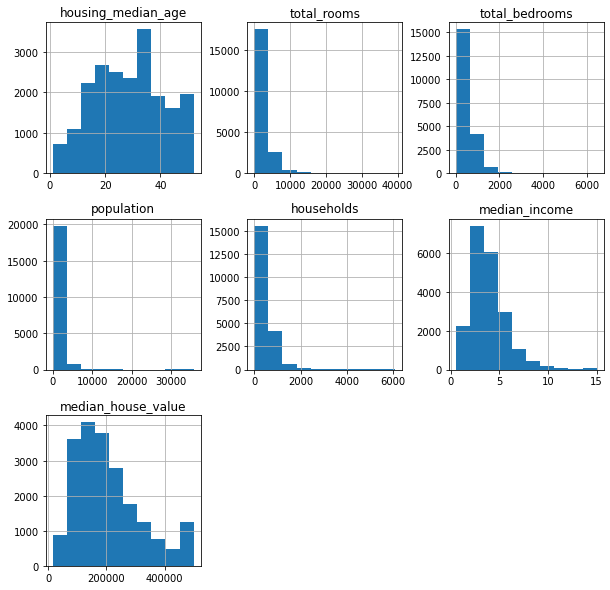

In [4]:
_ = housing.drop(columns=['longitude', 'latitude']).hist(bins=10, figsize=(10, 10))
print(housing['housing_median_age'].value_counts(bins=10))
print(housing['median_house_value'].value_counts(bins=10))

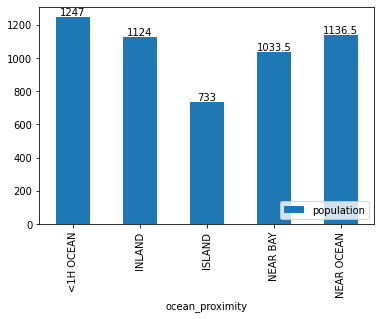

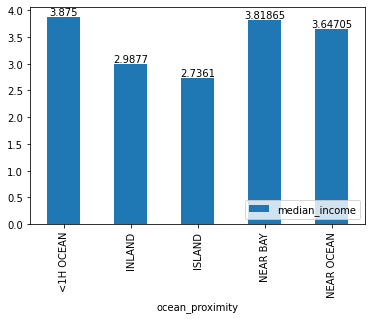

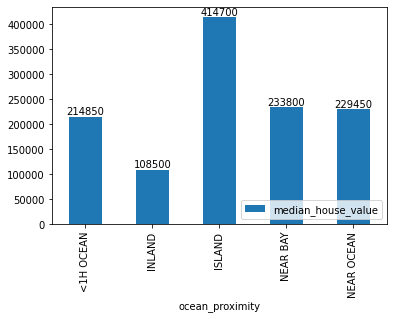

In [30]:
op = housing.groupby(by=['ocean_proximity'])
op_med = op.median().reset_index().drop(columns=['longitude', 'latitude'])
ax = op_med.plot.bar('ocean_proximity', 'population')
ax.legend(loc='lower right')
_ = ax.bar_label(ax.containers[0])
ax = op_med.plot.bar('ocean_proximity', 'median_income')
ax.legend(loc='lower right')
_ = ax.bar_label(ax.containers[0])
ax = op_med.plot.bar('ocean_proximity', 'median_house_value')
ax.legend(loc='lower right')
_ = ax.bar_label(ax.containers[0])

Here's another view on the California housing data. Using feature [ocean_proximity] to group the data and the above are the results. The [population] and the [median_income] are similar where ISLAND has the lowest among the other proximities. However, the [median_house_value] of ISLAND is the highest by more than one hundred thousands. Exotic, unique architecture and secluded could be the reasons why the house value in ISLAND is so high. Other than ISLAND, most groups' [population] and [median_income] have a negatvie relationshiop. For instance, the INLAND group has high population and median_income in both features, but a very low house_values. The explanation here could be since the house value is so low, it attracts more people to move west so that they can get afforable housing. For the other groups